# **0 - Imports and dataset description**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import sklearn
import imblearn
import category_encoders
import xgboost as xgb

from ucimlrepo import fetch_ucirepo 

from category_encoders.target_encoder import TargetEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
import matplotlib.lines as mlines

import seaborn as sns

# Standard machine learning models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve

import itertools

pd.options.mode.chained_assignment = None

import matplotlib as mpl

from warnings import filterwarnings
filterwarnings('ignore')

1. **battery_power:** Total energy a battery can store in one time measured in mAh
2. **blue:** Has Bluetooth or not
3. **clock_speed:** Speed at which microprocessor executes instructions
4. **dual_sim:** Has dual SIM support or not
5. **fc:** Front Camera megapixels
6. **four_g:** Has 4G or not
7. **int_memory:** Internal Memory in Gigabytes
8. **m_dep:** Mobile Depth in cm
9. **mobile_wt:** Weight of mobile phone
10. **n_cores:** Number of cores of processor
11. **pc:** Primary Camera megapixels
12. **px_height:** Pixel Resolution Height
13. **px_width:** Pixel Resolution Width
14. **ram:** Random Access Memory in Megabytes
15. **sc_h:** Screen Height of mobile in cm
16. **sc_w:** Screen Width of mobile in cm
17. **talk_time:** Longest time that a single battery charge will last when you are talking
18. **three_g:** Has 3G or not
19. **touch_screen:** Has a touch screen or not
20. **wifi:** Has Wi-Fi or not


In [10]:
pip install pymc

  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached pytensor-2.20.0.tar.gz (3.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached etuples-0.3.9.tar.gz (30 kB)
  Preparing metadata (setup.py) ... done
  Using cached logical-unification-0.4.6.tar.gz (31 kB)
  Preparing metadata (setup.py) ... done
  Using cached miniKanren-1.0.3.tar.gz (41 kB)
  Preparing metadata (setup.py) ... done
  Using cached cons-0.4.6.tar.gz (26 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 kB 11.8 MB/s eta 0:00:0000:01
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 6.8 MB/s eta 0:00:00
  Created wheel for pytensor: filename=pytensor-2.20.0-cp311-cp311-macosx_10_9_universal2.whl size=1382310 sha256=74a249b035efd0fb69304

In [12]:
# PyMC for Bayesian Inference
import pymc as pm

In [13]:
## Helper Visualization Functions
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(12, len(trace.varnames)*1.5),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    plt.rcParams['font.size'] = 12
    # Labels with the mean value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (5, 10), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')
        
# Visualize a confusion matrix as a plot given the confusion matrix
def plot_confusion_matrix(cm, classes = ['No Diabetes', 'Diabetes'],
                          title='Diabetes Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)
# Calculate the accuracy and f1 score of a model
def calc_metrics(predictions, y_test):
    accuracy = np.mean(predictions == y_test)
    f1_metric = f1_score(y_test, predictions)

    print('Accuracy of Model: {:.2f}%'.format(100 * accuracy))
    print('F1 Score of Model: {:.4f}'.format(f1_metric))
    
    
    
    
# Determine the roc curve and the auc and display
def calc_roc(probs, y_test):
  # Calculate the area under the roc curve
  auc = roc_auc_score(y_test, probs)
  # Calculate metrics for the roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  
  plt.style.use('bmh')
  plt.figure(figsize = (8, 8))
  
  # Plot the roc curve
  plt.plot(fpr, tpr, 'b')
  plt.xlabel('False Positive Rate', size = 16)
  plt.ylabel('True Positive Rate', size = 16)
  plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % auc, 
            size = 18)

In [14]:
data = pd.read_csv('train.csv')


mapping = {0 : 0,
           1 : 0,
           2 : 1,
           3 : 1}

data['price_range']= data['price_range'].map(mapping)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0


In [15]:
data2=pd.read_csv('test.csv')
data2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


Recording the predictions made by your model on the test set and waiting to confirm the true values later can indeed be a practical approach, especially if obtaining the true values is difficult or time-consuming. This method allows you to accumulate a dataset of predicted values over time, which you can then compare against the actual values once they become available.

Implementing a Bayesian approach can also be beneficial in this scenario. Bayesian methods allow you to update your beliefs or predictions as new data becomes available. You can start with prior beliefs based on your model's initial predictions and update them iteratively as you gather more information about the true target values. This iterative updating process can help refine your predictions and improve the accuracy of your model over time.

In [16]:
data.shape

(2000, 21)

In [17]:
data.duplicated().sum()

0

In [18]:
data2.shape

(1000, 21)

In [19]:
for col in data.columns:
    print(f'{col} :', data[col].nunique())

battery_power : 1094
blue : 2
clock_speed : 26
dual_sim : 2
fc : 20
four_g : 2
int_memory : 63
m_dep : 10
mobile_wt : 121
n_cores : 8
pc : 21
px_height : 1137
px_width : 1109
ram : 1562
sc_h : 15
sc_w : 19
talk_time : 19
three_g : 2
touch_screen : 2
wifi : 2
price_range : 2


In [20]:
# Get unique values and counts for each column
unique_values_counts = {}
for column in data.columns:
    unique_values_counts[column] = data[column].value_counts()

# Print unique values and counts for each column
for column, unique_values_count in unique_values_counts.items():
    print(f"Column: {column}")
    print(unique_values_count)
    print()


Column: battery_power
battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

Column: blue
blue
0    1010
1     990
Name: count, dtype: int64

Column: clock_speed
clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64

Column: dual_sim
dual_sim
1    1019
0     981
Name: count, dtype: int64

Column: fc
fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

Column: four_g
four_g
1    1043
0     957
Name: count, dtype: int64

Column: int_memory
i

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,0.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,0.500125
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,0.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


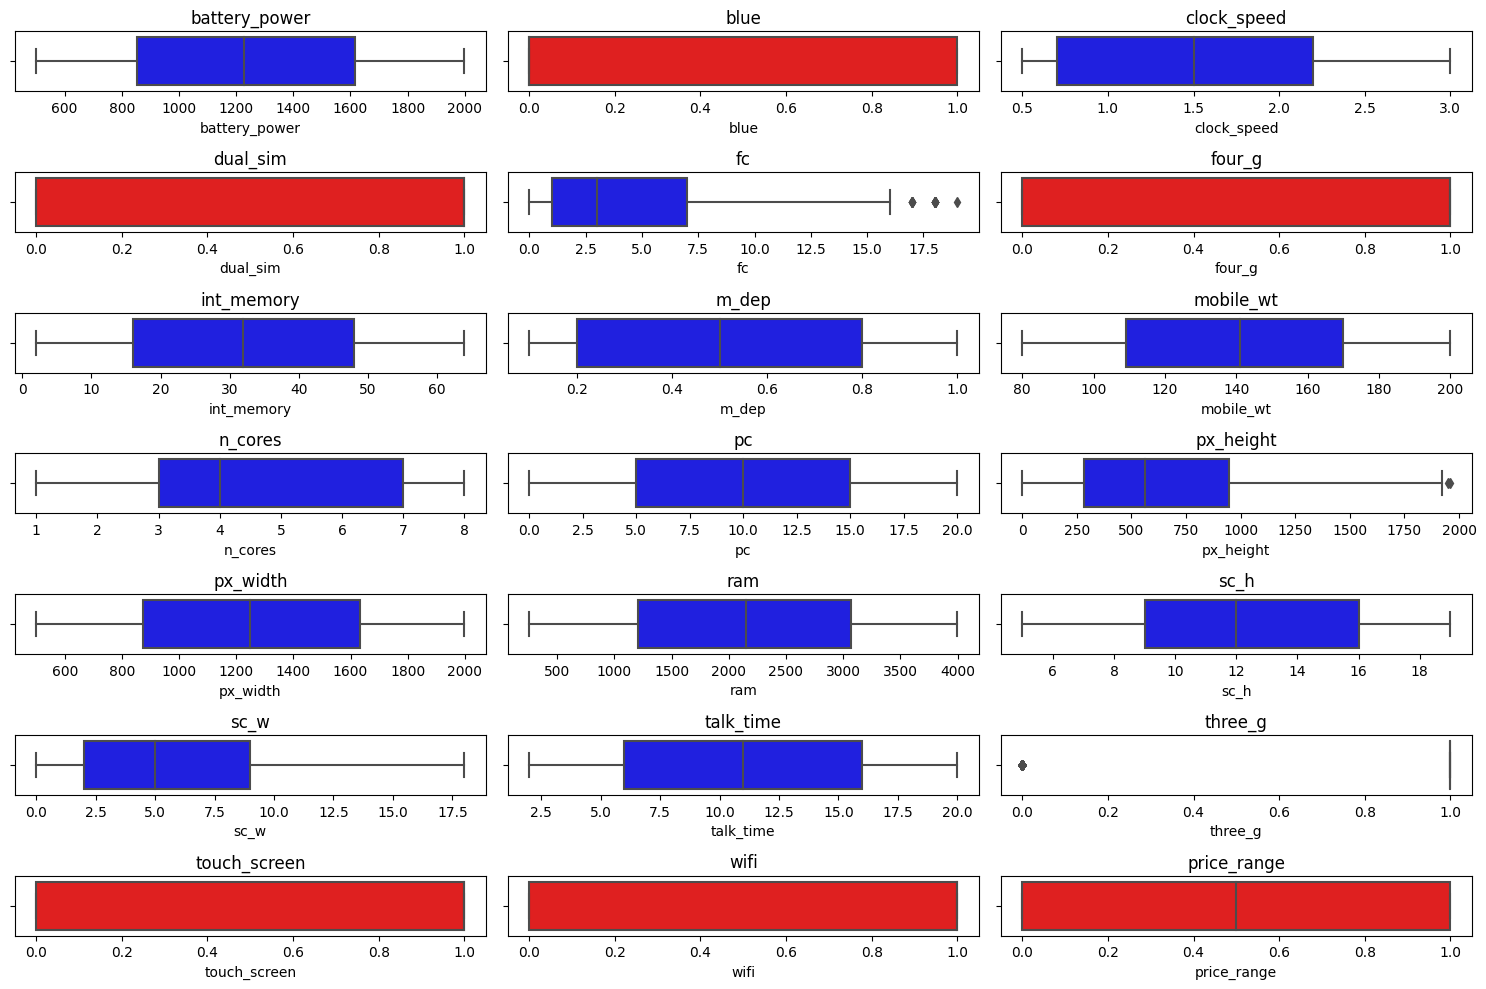

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numerical and binary columns
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

# Define subplot layout for numerical features
num_numerical_columns = len(numerical_columns)
num_rows_numerical = (num_numerical_columns // 3) + (num_numerical_columns % 3 > 0)  # Adjust for odd number of numerical columns

# Create subplots for numerical features
fig, axes = plt.subplots(num_rows_numerical, 3, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot box plots for numerical features
for i, column in enumerate(numerical_columns):
    color = 'blue'  # Default color for numerical features
    if column in binary_columns:
        color = 'red'  # Change color for binary features
    sns.boxplot(x=data[column], ax=axes[i], color=color)
    axes[i].set_title(column)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


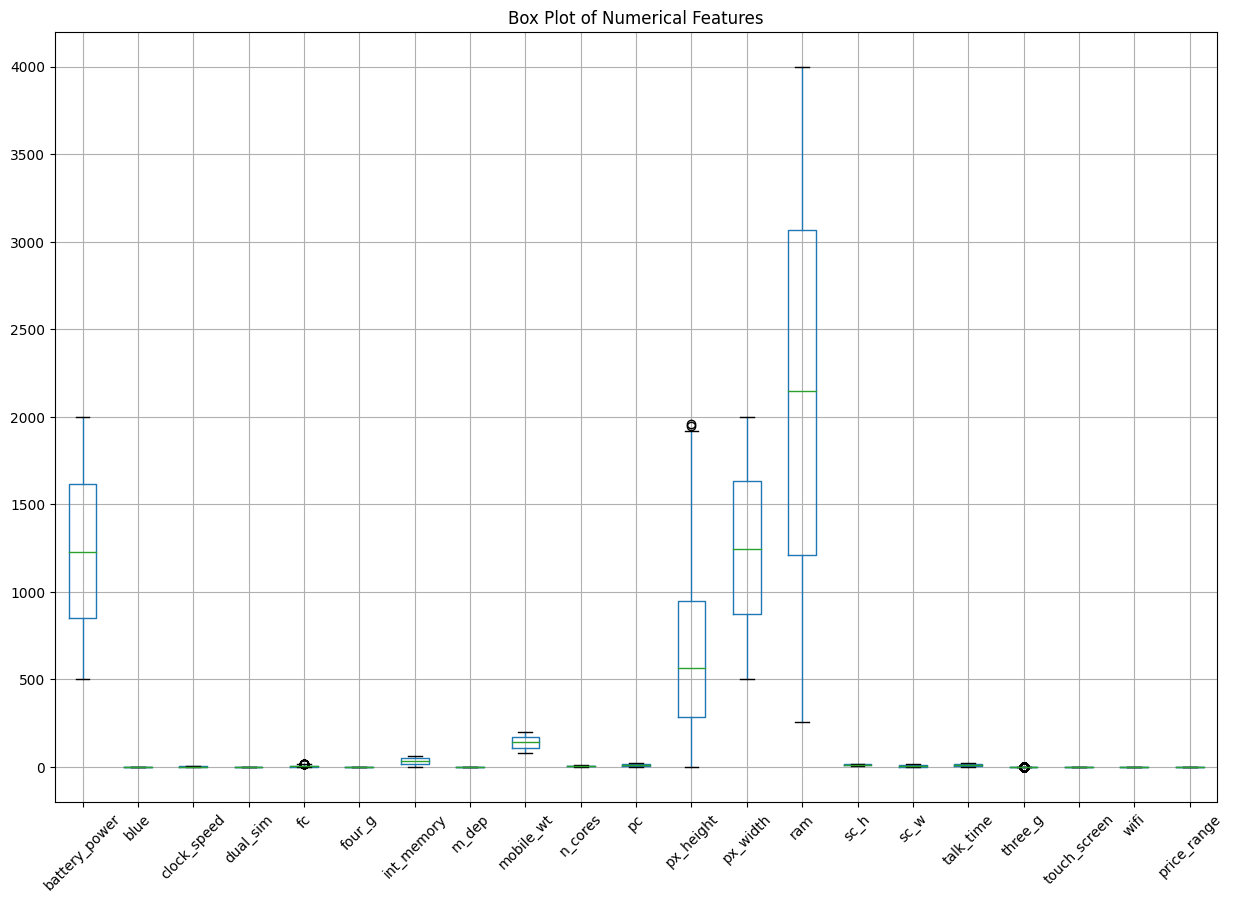

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()




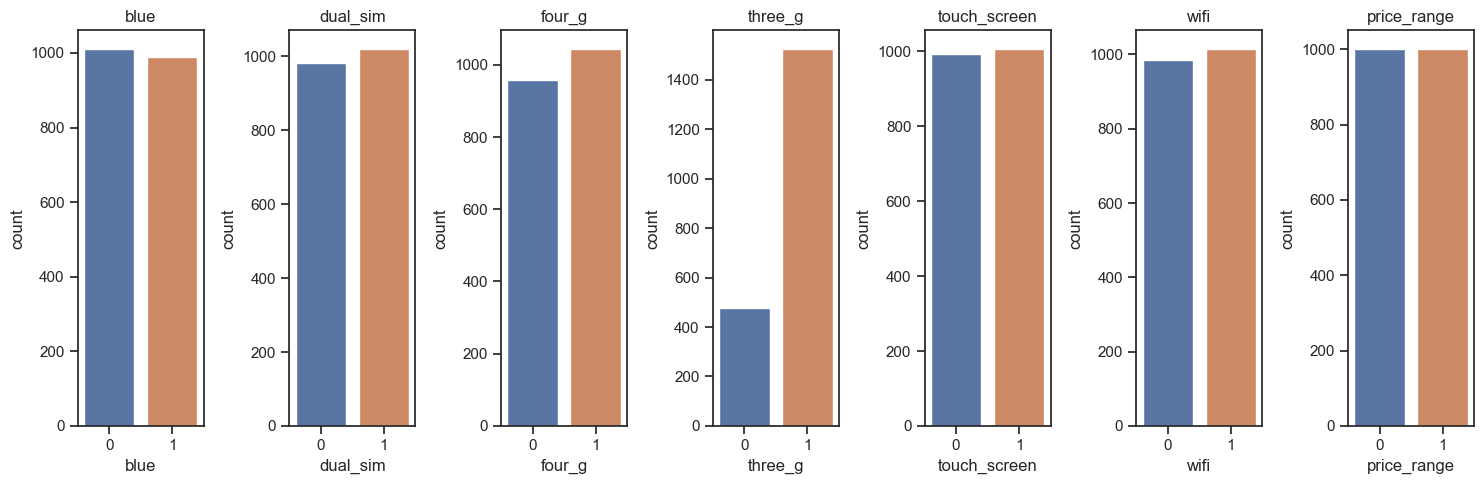

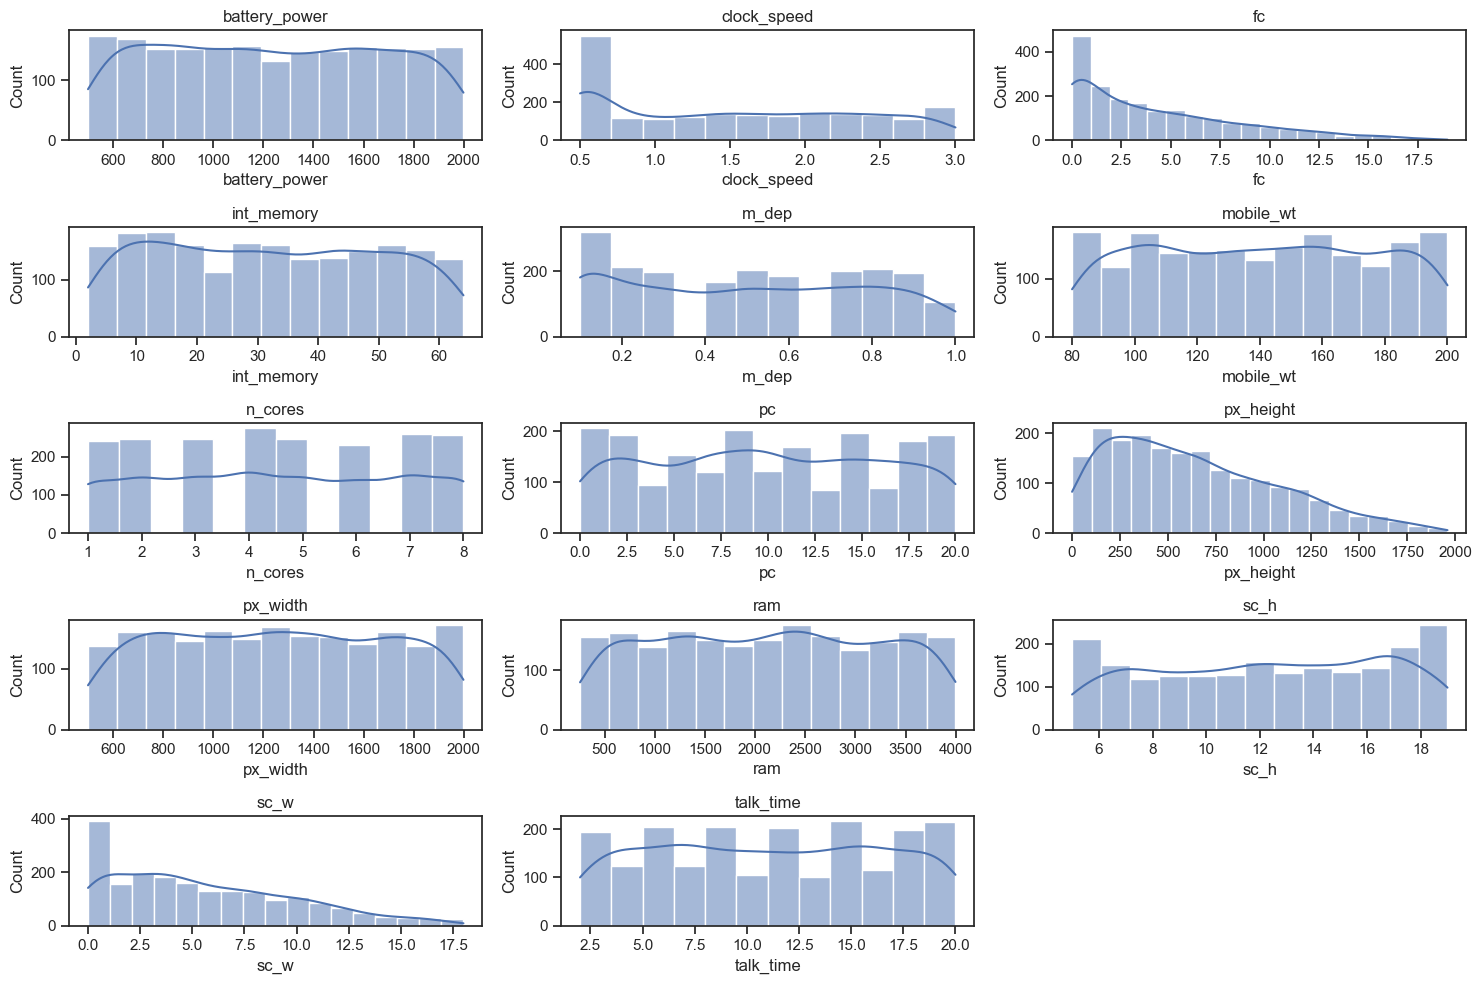

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Filter binary and numerical columns
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in binary_columns]

# Plot count plots for binary features
num_binary_columns = len(binary_columns)
num_rows_binary = 1
num_cols_binary = num_binary_columns  # Adjust for odd number of columns

plt.figure(figsize=(15, 5))

for i, column in enumerate(binary_columns, 1):
    ax = plt.subplot(num_rows_binary, num_cols_binary, i)
    sns.countplot(x=column, data=data, ax=ax)
    plt.title(column)

plt.tight_layout()
plt.show()

# Plot histograms for numerical features
num_numerical_columns = len(numerical_columns)
num_rows_numerical = (num_numerical_columns // 3) + (num_numerical_columns % 3 > 0)  # Adjust for odd number of columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    ax = plt.subplot(num_rows_numerical, 3, i)
    sns.histplot(data[column], kde=True, ax=ax)
    plt.title(column)

plt.tight_layout()
plt.show()


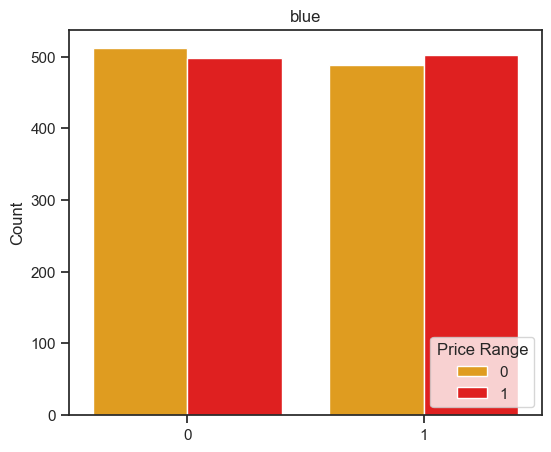

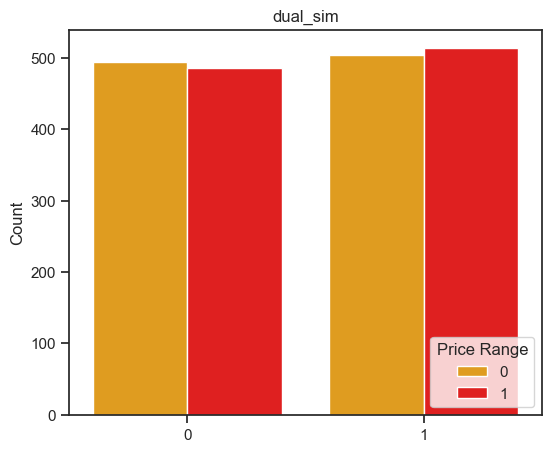

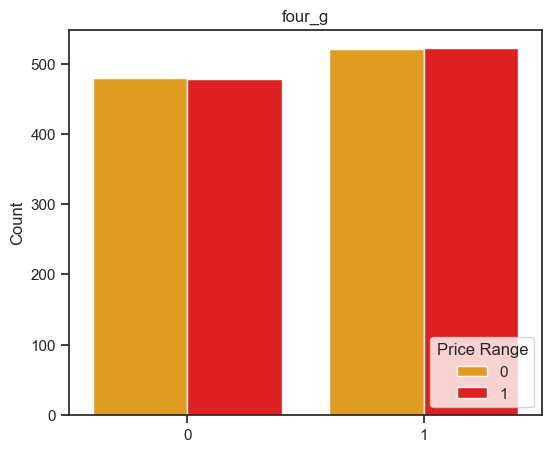

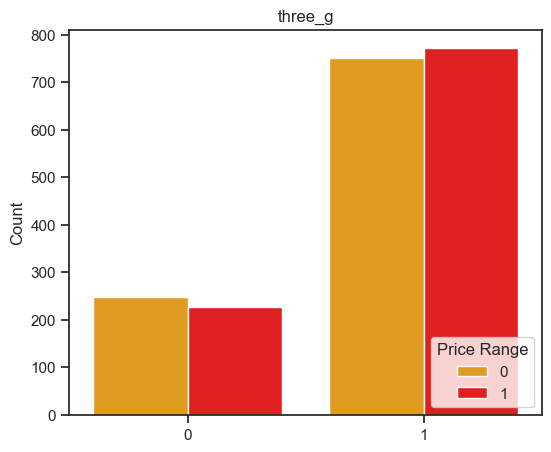

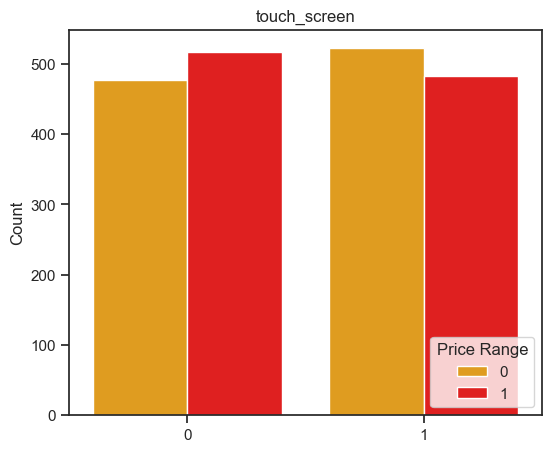

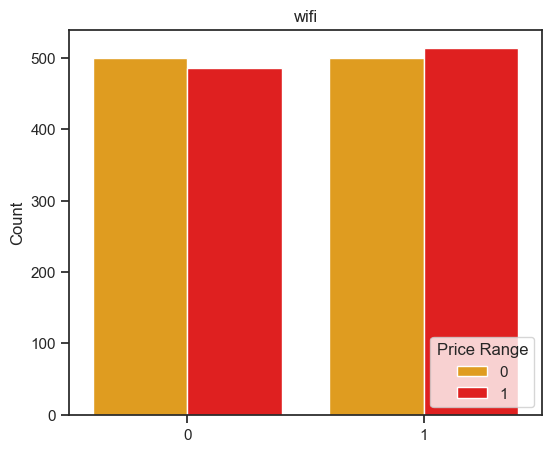

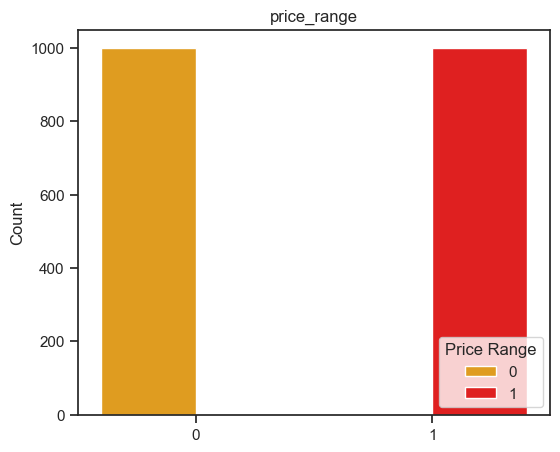

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Define custom colors for price ranges
price_range_colors = {0: 'orange', 1: 'red'}

# Filter binary and numerical columns
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in binary_columns]

# Define subplot layout
num_binary_columns = len(binary_columns)
num_rows_binary = 1
num_cols_binary = num_binary_columns  # Adjust for odd number of columns



# Plot count plots for binary features with colors based on price range
for i, column in enumerate(binary_columns, 1):
    plt.figure(figsize=(50, 5))
    ax = plt.subplot(num_rows_binary, num_cols_binary, i)
    sns.countplot(x=column, dodge=True, hue="price_range", data=data, palette=price_range_colors, ax=ax)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Price Range', loc='lower right')

    plt.show()


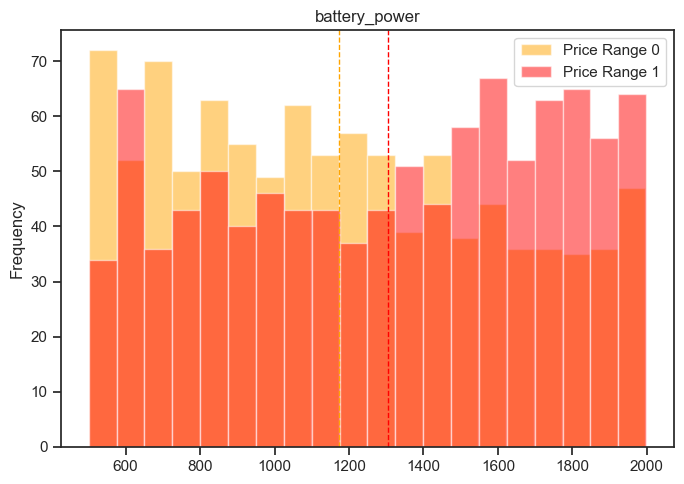

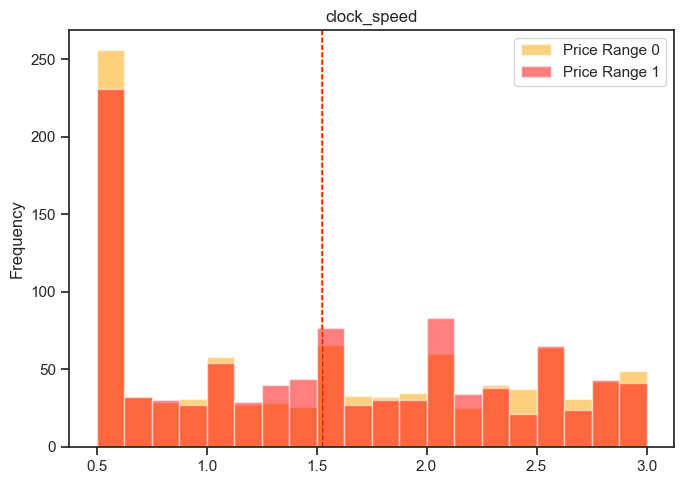

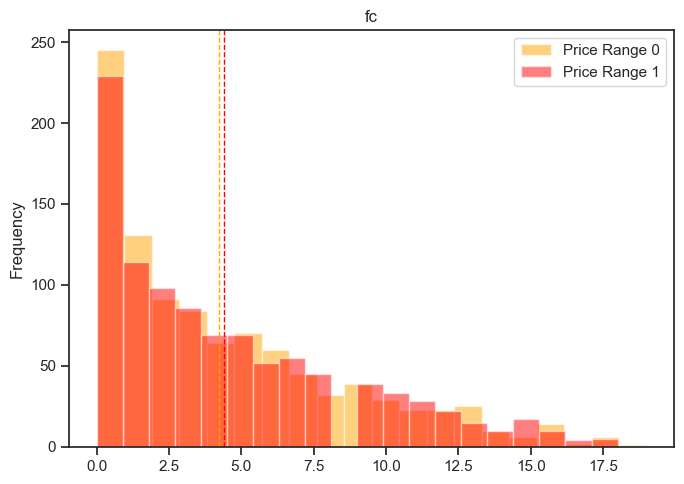

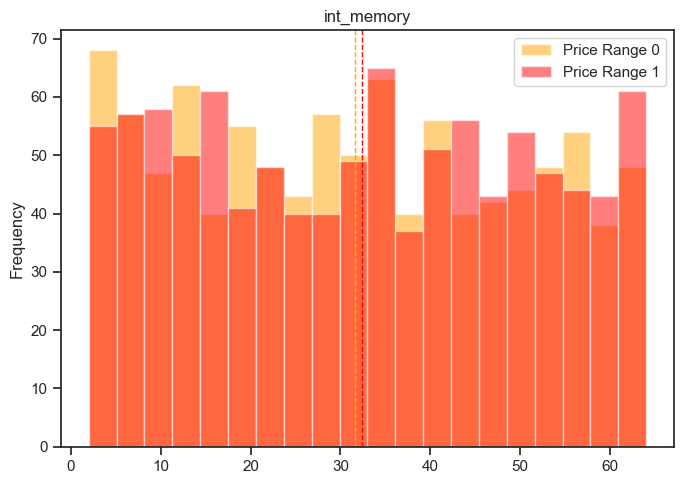

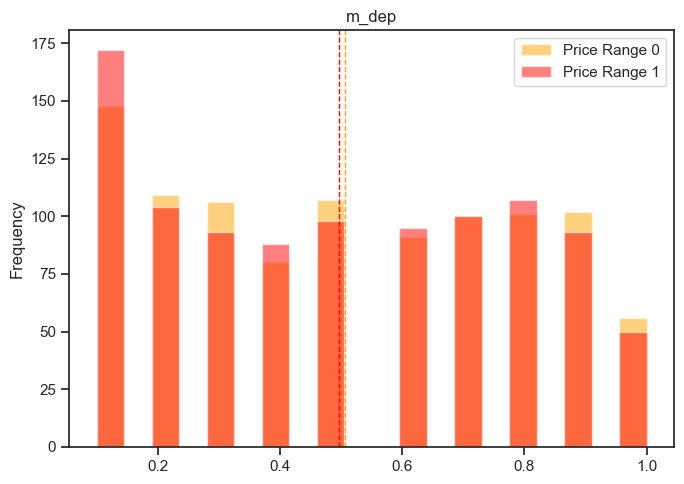

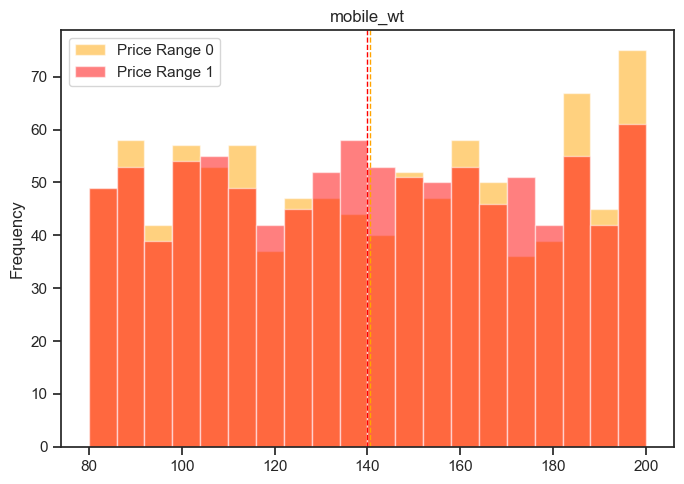

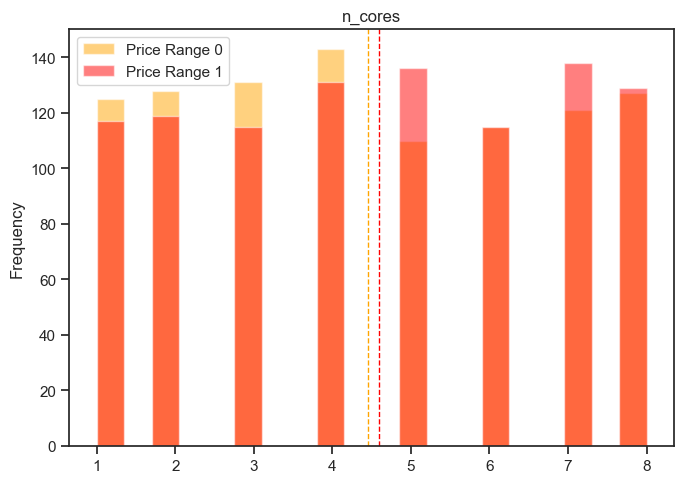

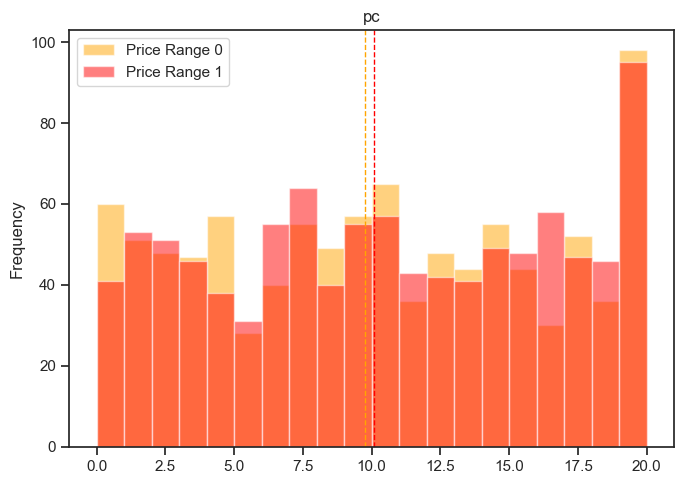

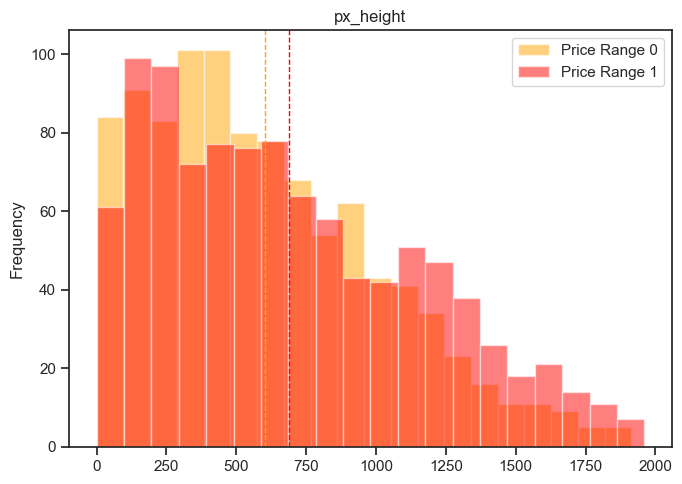

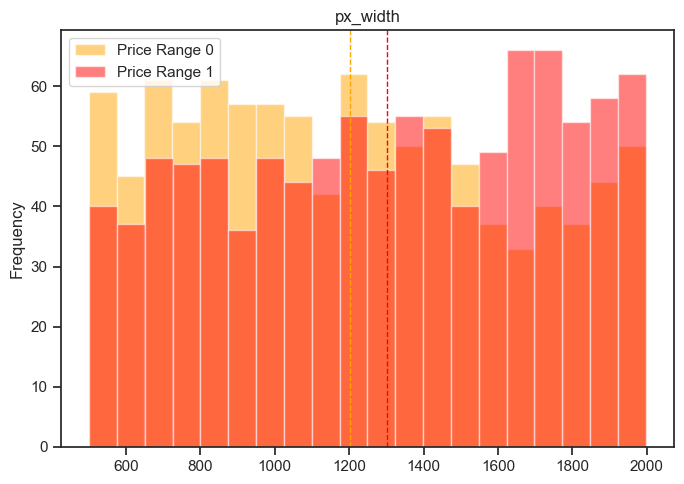

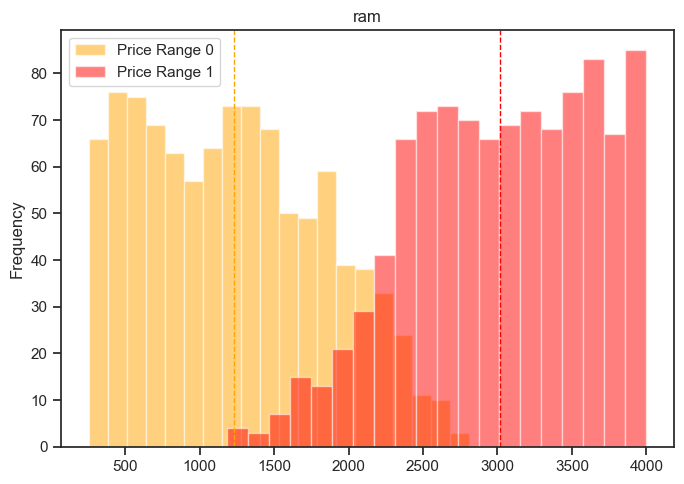

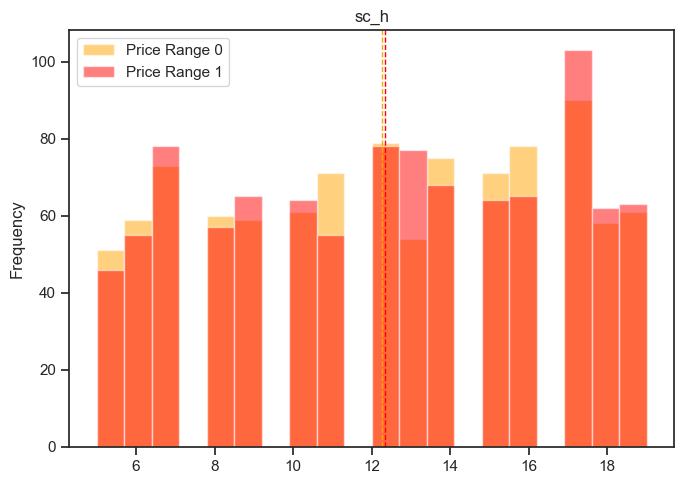

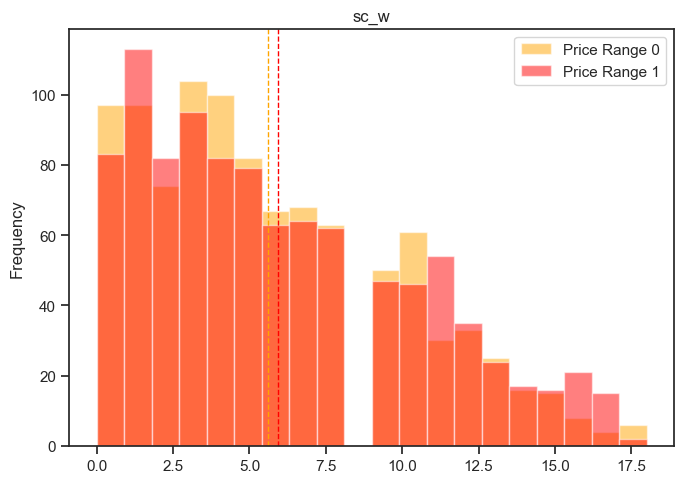

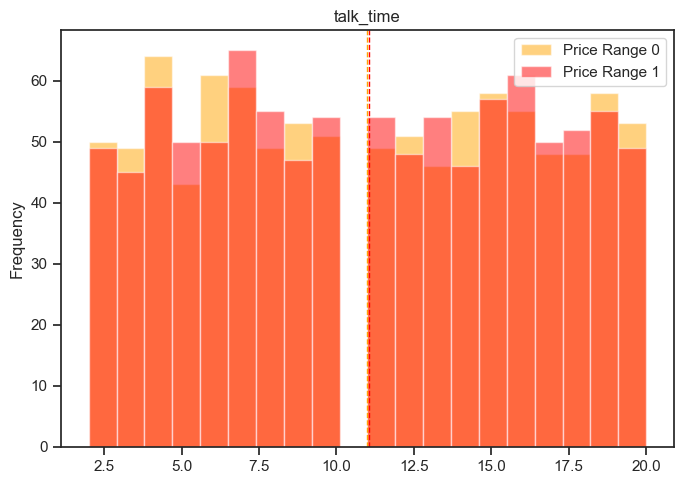

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Filter binary and numerical columns
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in binary_columns]

# Define custom colors for price ranges
price_range_colors = {0: 'orange', 1: 'red'}

# Plot histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(7, 5))
    
    # Plot histograms with different colors for each price range
    for price_range, color in price_range_colors.items():
        subset_data = data[data['price_range'] == price_range]
        plt.hist(subset_data[column], bins=20, color=color, alpha=0.5, label=f'Price Range {price_range}')
        
        # Plot mean line for each price range
        mean_value = subset_data[column].mean()
        plt.axvline(mean_value, color=color, linestyle='--', linewidth=1)
    
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


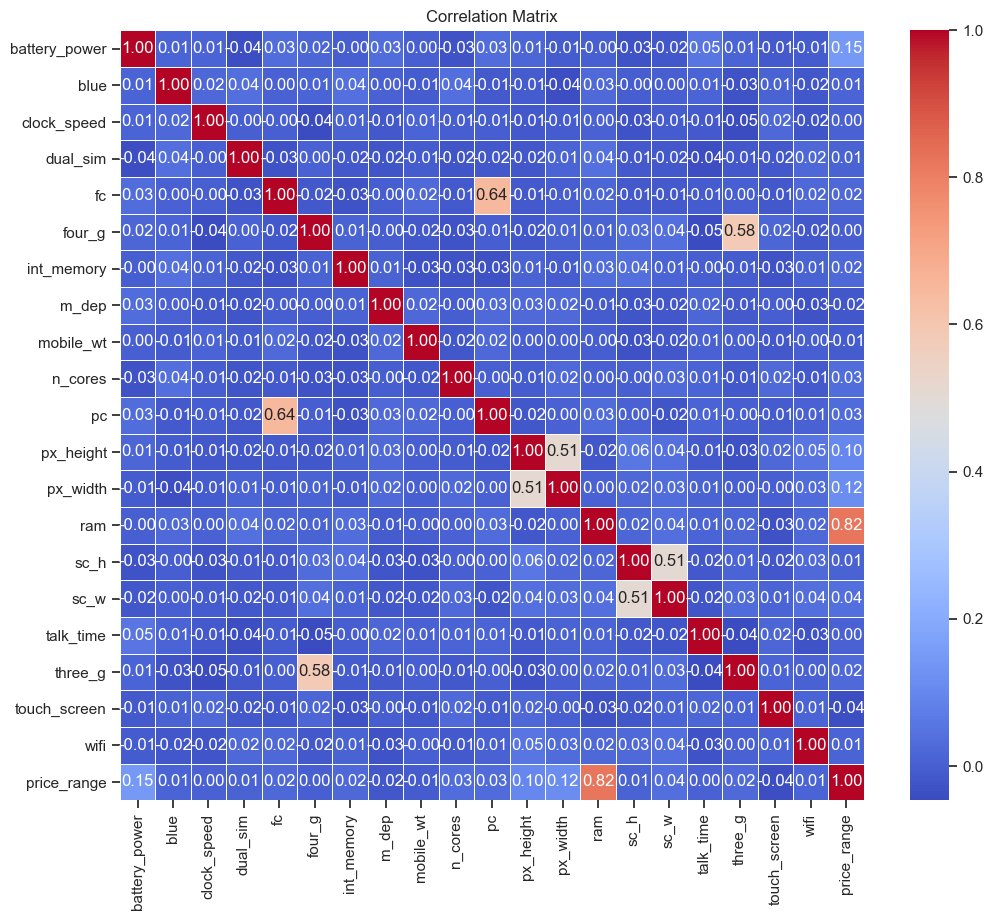

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# **1 - Data Pre-Processing**

### 1.1 - Basic Pre-Processing

In [30]:
# Define the threshold for considering a variable as categorical
threshold_unique_values = 10

# Identify categorical variables
categorical_columns = [col for col in data.columns if data[col].nunique() < threshold_unique_values]

# Print the identified categorical columns
print("Categorical Columns:")
print(categorical_columns)


for col in categorical_columns:
    print(f'{col} :', data[col].nunique())

Categorical Columns:
['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
blue : 2
dual_sim : 2
four_g : 2
n_cores : 8
three_g : 2
touch_screen : 2
wifi : 2
price_range : 2


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize Label Encoder for binary variables
label_encoder = LabelEncoder()


# Binary Variables: Apply Label Encoding
binary_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

    from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories
ordinal_categories = [i for i in range(11)]

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories])

# Encode the 'n_cores' column
data['n_cores'] = ordinal_encoder.fit_transform(data[['n_cores']])



#data.drop(columns=['n_cores'], inplace=False)
data.describe()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:
data.shape

(2000, 21)

In [35]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable from scaling
features = data.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'])

# Initialize the scaler
scaler = StandardScaler() 

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the unscaled target variable back to the DataFrame
scaled_df['blue'] = data['blue']
scaled_df['dual_sim'] = data['dual_sim']
scaled_df['four_g'] = data['four_g']
scaled_df['three_g'] = data['three_g']
scaled_df['touch_screen'] = data['touch_screen']
scaled_df['wifi'] = data['wifi']
scaled_df['price_range'] = data['price_range']

# Check the shape of the scaled DataFrame
print("Shape of scaled DataFrame:", scaled_df.shape)


Shape of scaled DataFrame: (2000, 21)


In [36]:
scaled_df.duplicated().sum()

0

In [37]:
scaled_df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,0,0,1,0
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,1,1,0,1
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,1,1,1,0,1
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,1,0,0,1
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,0,1,1,1,0,0


In [38]:
scaled_df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.149392e-16,-1.545430e-16,5.861978e-17,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,0.4950,0.509500,0.521500,0.761500,0.503000,0.507000,0.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.5001,0.500035,0.499662,0.426273,0.500116,0.500076,0.500125
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
scaled_df.duplicated().sum()

0

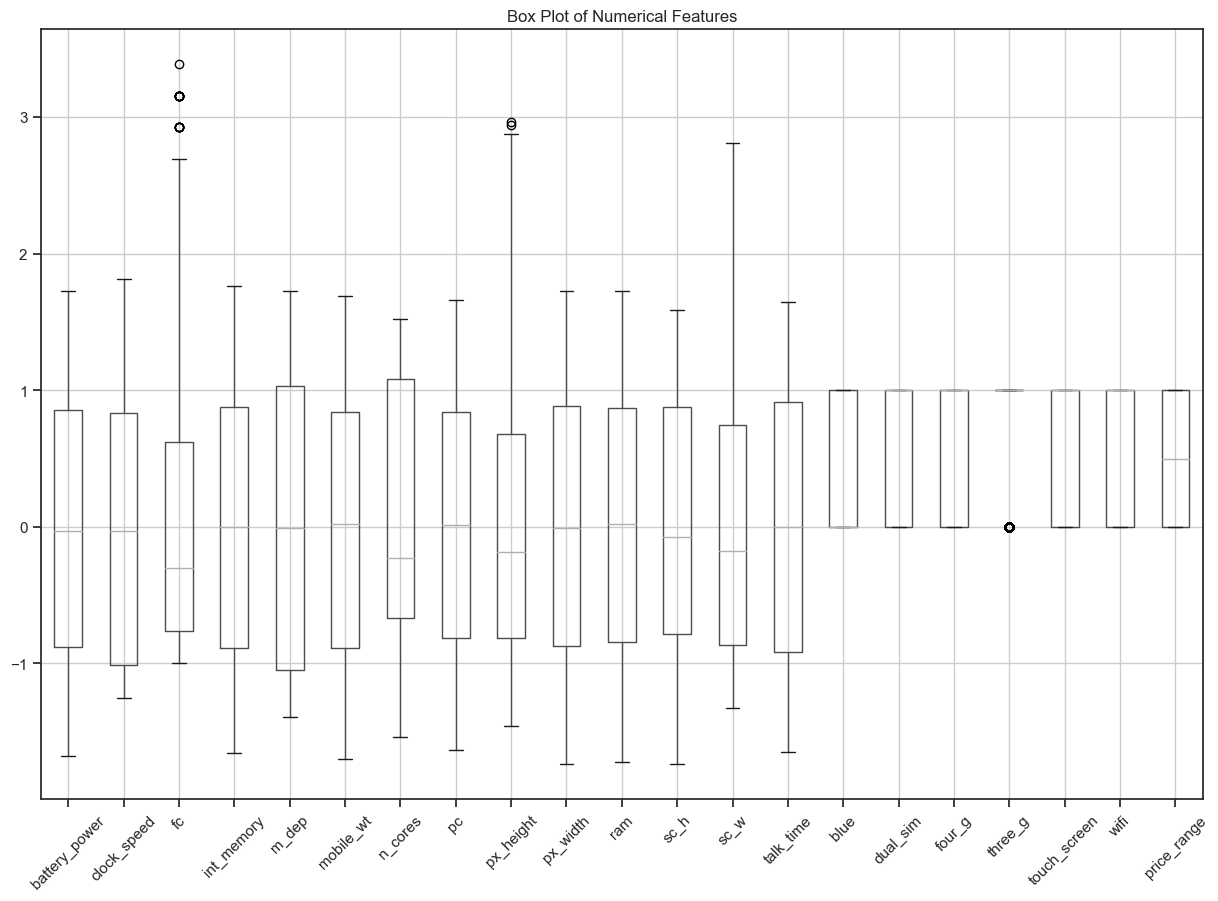

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
scaled_df.boxplot()
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()




### Outliers

In [ ]:
from scipy import stats

# Calculate Z-scores for each column excluding 'price_range'
z_scores = stats.zscore(scaled_df.drop(columns=['price_range']))

# Define threshold for identifying outliers
threshold = 3

# Find indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Create a copy of the DataFrame to keep the original data intact
cleaned_df = scaled_df.copy()

# Set outliers to NaN for all columns except 'price_range'
cleaned_df.loc[outlier_indices, cleaned_df.columns != 'price_range'] = np.nan

# Convert the column names to a list and plot box plots for numerical features after removing outliers
plt.figure(figsize=(15, 10))
cleaned_df.boxplot()  # Exclude 'price_range' from box plot
plt.title('Box Plot of Numerical Features (Outliers Removed)')
plt.xticks(rotation=45)
plt.show()


## Perform **train-test split**.

In [41]:
X = scaled_df.loc[:, scaled_df.columns != 'price_range']
y = scaled_df['price_range']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

# Bayesian Logistic Regression

The first step is to define our model. In the frequentist interpretation of Logistic Regression, the natural log odds of the output, called the logits, are assumed to be generated from a linear combination of the inputs (the features) plus an error term to account for random sampling noise or latent variables. The frequentist interpretation formula is as follows:

$$\text{logit} = \beta_0 + \beta_1(\text{Pregnancies}) + \beta_2(\text{Glucose}) + \beta_3(\text{BloodPressure}) + \beta_4(\text{SkinThickness}) + \beta_5(\text{Insulin}) + \beta_6(\text{BMI}) + \beta_7(\text{DiabetesPedigreeFunction}) + \beta_8(\text{Age}) + \epsilon$$

The log odds can then be converted to a proability of the output:

$$p = \frac{1}{1 + e^\text{-logit}}$$

For our problem, we are interested in finding the probability a patient has diabetes given the medical evidence:

$$p(\text{Diabetes} | \text{Features})$$

The objective is to learn the "best" $\beta$ values which generally means those that are the most likely given a set of inputs and outputs. Logistic Regression calculates the values of $\beta$ using an iterative procedure of Maximum Likelihood Estimation.

In contrast, the Bayesian Framework assumes that the likelihood of the data is drawn from a distribution. For classification with a binary outcome, this is a bernoulli distribution:

$$p(Diabetes | Features) = \prod^{n}_{i=1} p_{i}^{y} (1 - p_{i})^{1-y_{i}}$$

Where $y_i = 1$ if the patient has diabetes and $y_i = 0$ if the patient does not have diabetes. $p_i$ is the probability defined above, $p_i = \frac{1}{1 + e^\text{-logit_i}}$ with the $\text{logit}$ a linear combination of the model parameters. 

$$\text{logit_i} = \beta_0 + \beta_1(\text{Pregnancies}) + \beta_2(\text{Glucose}) + \beta_3(\text{BloodPressure}) + \beta_4(\text{SkinThickness}) + \beta_5(\text{Insulin}) + \beta_6(\text{BMI}) + \beta_7(\text{DiabetesPedigreeFunction}) + \beta_8(\text{Age})$$

The objective is to find the posterior probability distribution of the model parameters given the inputs and outputs.

$$P(\beta | X , y) = \frac{P(y| \beta, X)P(\beta|X)}{P(X, y)}$$

where $P(y| \beta, X)$ is the data likelihood, $P(\beta|X)$ is the prior on the parameters, and $P(X, y)$ is a normalization constant so the probability of the parameters sums to one. In reality, calculating the exact posterior for the model parameters is intractable with continuous variables, and so we use Monte Carlo sampling methods. This means that we draw repeated samples from the posterior in order to approximate the posterior. Generally this is done with some form of a Markov Chain Monte Carlo algorithm, in which the next state is dependent only a bounded subset of the current state and past states (depending on the order of the chain). In the Bayesian Framework, the end result of linear regression is not a single point estimate for the "best" model parameters, but rather an entire distribution of potential model parameters representing our uncertainty about the true values. 

In the Bayesian method, not only are the log odds assumed to be generated from a distribution, but so are the model parameters. If we have an idea about the parameters, we can encode this in the priors, or we can let the data speak and choose non-informative priors. Usually this means a normal distribution with a wide standard devivation for $\beta$. In the case of infinite data, the priors will be completely washed out by the data likelihood. There are two primary advantages to the Bayesian method:

1. __Priors__: if we have information about the model parameters, we can inject it into the model
2. __Posterior distributions__: the result is a distribution for the model parameters instead of a point estimate

We can use the mean of the parameter distributions if we want to obtain a single "most likely" prediction by calculating the log odds and then converting to a probability, but we can also express a range of probabilities. As the amount of training data increases, the uncertainty in the model parameters should decrease. In the case of limited data, Bayesian methods can be a better way to quantify uncertainty because the possible distribution of parameters will be wide and the standard deviation of the log odd distribution will be large. Although frequentist logistic regression can include confidence intervals, Bayesian methods can provide a more inuitive display of uncertainty in the cases of limited data. 

The end result of "fitting" the model by drawing samples from the posterior will be a distribution for each $\beta$ model weight. The distribution can be used to make predictions and to examine the effects on the outcome of changing the value of different input variables (sensitivity analysis). First, we will build up the model and sample from the posterior, and then we will thoroughly interpret the modeling results. Additionally, we can make predictions and compare the results to standard machine learning models, although the benefit of Bayesian Methods is not so much in the accuracy, as in the interpretability of the results of the modeling. 

### Formula for Logistic Regression

Now on to the details. The `PyMC3` library has a module called `GLM` which implements a function called `GLM.from_formula`. This accepts an R style formula and builds up a model for us. It adds random variables (by default a normal distribution with a large standard deviation) for each of the features, a random variable for the intercept, and a normal distribution by default for the data likelihood. In this case, we need to change the data likelihood from a normal distribution to a Bernoulli distribution because we are using a binary outcome variable. 

In [56]:
# Build up a formula
formula = [' %s + ' % variable for variable in X_train.columns]
formula.insert(0, 'y ~ ')
formula = ' '.join(''.join(formula).split(' ')[:-2])
formula

'y ~  battery_power +  clock_speed +  fc +  int_memory +  m_dep +  mobile_wt +  n_cores +  pc +  px_height +  px_width +  ram +  sc_h +  sc_w +  talk_time +  blue +  dual_sim +  four_g +  three_g +  touch_screen +  wifi'

This follows the R programming language formula syntax where `~` means "is a function of". Here we are stating that `y` is a function of eight variables in a linear combination. In this equation,  `y` represents the log odds of diabetes which we can convert to a probability using the following equation:

$$P(Diabetes | features) = \frac{1}{1 + e^{-y}}$$


## Implementing the Logistic Model

The first model will use all eight features. We create the model using the formula defined above and then draw samples from the posterior using the No-UTurn Sampler (NUTS). This is a variation of the Metropolis-Hastings algorithm. Both of these algorithms fall under the general category of Markov Chain Monte Carlo methods because they sample random values from the posterior with the next value dependent only on the current state (or a bounded subset of previous states). 

The data likelihood is a Bernoulli Variable because it satisfies the following three conditions:

1. Outcome is binary: 0 for does not have diabetes and 1 for has diabetes
2. Trials are independent of each other.
3. The probability of the outcome does not change with each trial. 

If we have some prior knowledge, we can encode that if the priors for the $\beta$ coefficients, or we can use the default priors in PyMC3. The default priors for regressors (the explanatory variables) are normal with the distribution $N(0, 10^{6})$ and the default prior for the Intercept is a flat distribution. In the call to create our model, we will pass in the formula, our training data, and the distribution to use for the response variable, which is a Bernoulli distribution. 

In [57]:
# Create version of the training data with labels
X_with_labels = X_train.copy()
X_with_labels['y'] = y_train

In [60]:
# Create the model in a context
with pm.Model() as logistic_model:
  
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = X_with_labels, family = pm.glm.families.Binomial())
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log = pm.sample(draws=5000, step = sampler, chains=2, tune=1000, random_seed=100)

AttributeError: module 'pymc' has no attribute 'GLM'

In [54]:
import pymc as pm

with pm.Model() as bayesian_logistic_model:
    # Define priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=X_train.shape[1])
    
    # Define logistic transformation
    logits = intercept + pm.math.dot(X_train, coefficients)
    probabilities = pm.math.sigmoid(logits)
    
    # Define likelihood
    y_observed = pm.Bernoulli('y_observed', p=probabilities, observed=y_train)


In [55]:
with bayesian_logistic_model:
    # Sample from the posterior distribution
    trace = pm.sample(draws=1000, tune=1000, chains=4, cores=4)


AssertionError: 

In [52]:
# Predictions
with bayesian_logistic_model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)

y_pred = ppc['y_observed'].mean(axis=0) > 0.5

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, ppc['y_observed'].mean(axis=0))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")


NameError: name 'trace' is not defined

In [53]:
# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(objective="multi:softmax",
                          num_class=4,  # Number of classes in the target variable
                          scale_pos_weight=10,
                          max_depth=24,
                          n_estimators=180,
                          learning_rate=0.1,
                          reg_lambda=6,
                          base_score=0.2,
                          alpha=1)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9825


In [ ]:
y_pred

In [ ]:
predictions = []
for i in range(0,10):
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    

In [ ]:
predictions